Đọc các file Excel trong bộ dữ liệu

In [33]:
import pandas as pd
import os
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
folder_path = "Data"
print(f"Đang đọc các file Excel trong thư mục: {folder_path}\n")

Đang đọc các file Excel trong thư mục: Data



In [35]:
# Đọc file và kiểm tra dữ liệu
for file_name in os.listdir(folder_path):
    if file_name.endswith(('.xlsx', '.xls')):
        file_path = os.path.join(folder_path, file_name)
        
        try:
            # Đọc file Excel
            data = pd.read_excel(file_path)
            
            # Lấy số hàng và số cột
            num_rows = data.shape[0]
            
            print(f"File: {file_name}")
            print(f"Kích thước: {num_rows} hàng")

            # Null checking
            null_counts = data.isnull().sum()
            
            # Hiển thị các cột có giá trị null
            if null_counts.sum() > 0:
                print("Số giá trị null theo cột:")
                print(null_counts[null_counts > 0])  # Chỉ hiển thị cột có null
                print(f"\nTổng số giá trị null: {null_counts.sum()}")
            else:
                print("Không có giá trị null nào trong file này")
            
            print("-" * 50)

        except Exception as e:
            print(f"Lỗi khi đọc file {file_name}: {e}")

File: SHGC-0.1_Tvis-0.9_Uval-0.05_modified.xlsx
Kích thước: 779 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-1.00_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-2.00_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-3.00_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-4.00_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-5.00_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-6.00_

Gộp tất cả các file lại vào một DataFrame

In [36]:
# Tạo DataFrame cho train và test
df = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith(('.xlsx', '.xls')):
        file_path = os.path.join(folder_path, file_name)
        
        try:
            # Đọc file Excel
            data = pd.read_excel(file_path)

            
            # Cộng dồn vào biến tổng
            df = pd.concat([df, data], ignore_index=True)
            
            print(f"Đã xử lý: {file_name} ({len(data)} dòng)")
            
        except Exception as e:
            print(f"Lỗi khi xử lý {file_name}: {str(e)}")

# Kết quả cuối cùng
print("\nKết quả tổng hợp:")
print(f"Tổng df: {len(df)} dòng")

Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-0.05_modified.xlsx (779 dòng)
Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-1.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-2.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-3.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-4.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-5.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-6.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-0.05_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-1.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-2.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-3.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-4.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-5.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-6.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.5_Tvis-0.9_Uval-0.05_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.5_Tvis-0.9_Uval-1.00_modified.xlsx (77

In [37]:
df

,in:SHGC,in:U-val,out:P1_l,out:P1_r,out:P1_x,out:P1_y,out:P2_l,out:P2_r,out:P2_x,out:P2_y,...,out:S3_d1,out:S3_d2,out:S3_d3,out:S3_d4,out:S3_xi,out:S3_yi,out:Total-CoolingLoad (J),out:Total_HEAT-LOSS(J),in:T-Vis,in:SHCG
0,0.1,0.05,20.000000,0.5 * Pi,40.000000,10.000000,20.0,0.5 * Pi,60.000000,10.000000,...,14.142136,14.142136,14.142136,14.142136,50.000000,0.000000,1882600000000,125510000000,NaN,NaN
1,0.1,0.05,22.679492,0.5 * Pi,37.320508,20.000000,20.0,0.5 * Pi,57.320508,20.000000,...,14.142136,14.142136,14.142136,14.142136,47.320508,10.000000,1848600000000,128940000000,NaN,NaN
2,0.1,0.05,25.773503,0.5 * Pi,30.000000,27.320508,20.0,0.5 * Pi,50.000000,27.320508,...,14.142136,14.142136,14.142136,14.142136,40.000000,17.320508,1794900000000,133580000000,NaN,NaN
3,0.1,0.05,30.000000,0.5 * Pi,20.000000,30.000000,20.0,0.5 * Pi,40.000000,30.000000,...,14.142136,14.142136,14.142136,14.142136,30.000000,20.000000,1807000000000,132440000000,NaN,NaN
4,0.1,0.05,37.320508,0.5 * Pi,10.000000,27.320508,20.0,0.5 * Pi,30.000000,27.320508,...,14.142136,14.142136,14.142136,14.142136,20.000000,17.320508,1846900000000,130010000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17845,NaN,0.90,2.679492,2.094395,5.000000,-11.339746,20.0,2.094395,22.320508,-21.339746,...,14.142136,14.142136,14.142136,14.142136,8.660254,-25.000000,10899000000000,17041000000,0.05,0.9
17846,NaN,0.90,10.000000,2.094395,12.320508,-18.660254,20.0,2.094395,29.641016,-28.660254,...,14.142136,14.142136,14.142136,14.142136,15.980762,-32.320508,11035000000000,17255000000,0.05,0.9
17847,NaN,0.90,14.226497,2.094395,22.320508,-21.339746,20.0,2.094395,39.641016,-31.339746,...,14.142136,14.142136,14.142136,14.142136,25.980762,-35.000000,11179000000000,16943000000,0.05,0.9
17848,NaN,0.90,17.320508,2.094395,32.320508,-18.660254,20.0,2.094395,49.641016,-28.660254,...,14.142136,14.142136,14.142136,14.142136,35.980762,-32.320508,11183000000000,17098000000,0.05,0.9


Chuyển giá trị Pi về số thực

In [38]:
# Chuyển tất cả các giá trị chứa "Pi" thành số thực
# ---------------------------------
def replace_pi_with_float(df):
    df = df.copy()

    # Thay thế 'Pi' thành giá trị số thực
    df = df.replace({'Pi': math.pi})

    # Thay thế các biểu thức dạng 'a * Pi' thành số thực
    for col in df.columns:
        # Duyệt qua từng ô và xử lý
        df[col] = df[col].apply(lambda x: eval(str(x).replace('Pi', 'math.pi')) if isinstance(x, str) else x)

    # Xử lý các giá trị NaN sau khi chuyển đổi
    df = df.fillna(0)  # Thay thế NaN bằng 0
    # Hoặc loại bỏ các hàng có NaN
    # df = df.dropna()  # Bỏ các hàng chứa NaN

    return df

In [39]:
# Áp dụng cho cả train và test
print ("Dữ liệu trước khi chuyển đổi giá trị 'PI':")
df.head()

Dữ liệu trước khi chuyển đổi giá trị 'PI':


,in:SHGC,in:U-val,out:P1_l,out:P1_r,out:P1_x,out:P1_y,out:P2_l,out:P2_r,out:P2_x,out:P2_y,...,out:S3_d1,out:S3_d2,out:S3_d3,out:S3_d4,out:S3_xi,out:S3_yi,out:Total-CoolingLoad (J),out:Total_HEAT-LOSS(J),in:T-Vis,in:SHCG
0,0.1,0.05,20.000000,0.5 * Pi,40.000000,10.000000,20.0,0.5 * Pi,60.000000,10.000000,...,14.142136,14.142136,14.142136,14.142136,50.000000,0.000000,1882600000000,125510000000,NaN,NaN
1,0.1,0.05,22.679492,0.5 * Pi,37.320508,20.000000,20.0,0.5 * Pi,57.320508,20.000000,...,14.142136,14.142136,14.142136,14.142136,47.320508,10.000000,1848600000000,128940000000,NaN,NaN
2,0.1,0.05,25.773503,0.5 * Pi,30.000000,27.320508,20.0,0.5 * Pi,50.000000,27.320508,...,14.142136,14.142136,14.142136,14.142136,40.000000,17.320508,1794900000000,133580000000,NaN,NaN
3,0.1,0.05,30.000000,0.5 * Pi,20.000000,30.000000,20.0,0.5 * Pi,40.000000,30.000000,...,14.142136,14.142136,14.142136,14.142136,30.000000,20.000000,1807000000000,132440000000,NaN,NaN
4,0.1,0.05,37.320508,0.5 * Pi,10.000000,27.320508,20.0,0.5 * Pi,30.000000,27.320508,...,14.142136,14.142136,14.142136,14.142136,20.000000,17.320508,1846900000000,130010000000,NaN,NaN


In [40]:
# In kết quả sau khi chuyển đổi
df = replace_pi_with_float(df)
print("Dữ liệu sau khi chuyển đổi giá trị 'Pi':")
df.head()

Dữ liệu sau khi chuyển đổi giá trị 'Pi':


,in:SHGC,in:U-val,out:P1_l,out:P1_r,out:P1_x,out:P1_y,out:P2_l,out:P2_r,out:P2_x,out:P2_y,...,out:S3_d1,out:S3_d2,out:S3_d3,out:S3_d4,out:S3_xi,out:S3_yi,out:Total-CoolingLoad (J),out:Total_HEAT-LOSS(J),in:T-Vis,in:SHCG
0,0.1,0.05,20.000000,1.570796,40.000000,10.000000,20.0,1.570796,60.000000,10.000000,...,14.142136,14.142136,14.142136,14.142136,50.000000,0.000000,1882600000000,125510000000,0.0,0.0
1,0.1,0.05,22.679492,1.570796,37.320508,20.000000,20.0,1.570796,57.320508,20.000000,...,14.142136,14.142136,14.142136,14.142136,47.320508,10.000000,1848600000000,128940000000,0.0,0.0
2,0.1,0.05,25.773503,1.570796,30.000000,27.320508,20.0,1.570796,50.000000,27.320508,...,14.142136,14.142136,14.142136,14.142136,40.000000,17.320508,1794900000000,133580000000,0.0,0.0
3,0.1,0.05,30.000000,1.570796,20.000000,30.000000,20.0,1.570796,40.000000,30.000000,...,14.142136,14.142136,14.142136,14.142136,30.000000,20.000000,1807000000000,132440000000,0.0,0.0
4,0.1,0.05,37.320508,1.570796,10.000000,27.320508,20.0,1.570796,30.000000,27.320508,...,14.142136,14.142136,14.142136,14.142136,20.000000,17.320508,1846900000000,130010000000,0.0,0.0


In [41]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo scaler
scaler = MinMaxScaler()

# Scale dữ liệu trong df
scaled_df_standard = scaler.fit_transform(df)

# Chuyển đổi kết quả về DataFrame
scaled_df_standard = pd.DataFrame(scaled_df_standard, columns=df.columns)

# Kiểm tra kết quả
print(scaled_df_standard.head())


   in:SHGC  in:U-val  out:P1_l  out:P1_r  out:P1_x  out:P1_y  out:P2_l  \
0      0.2       0.0  0.500000       0.5  0.848915  0.587229       0.5   
1      0.2       0.0  0.577350       0.5  0.825542  0.674458       0.5   
2      0.2       0.0  0.666667       0.5  0.761686  0.738314       0.5   
3      0.2       0.0  0.788675       0.5  0.674458  0.761686       0.5   
4      0.2       0.0  1.000000       0.5  0.587229  0.738314       0.5   

   out:P2_r  out:P2_x  out:P2_y  ...  out:S3_d1  out:S3_d2  out:S3_d3  \
0       0.5  0.981382  0.580230  ...   0.175776   0.175776    0.11071   
1       0.5  0.959885  0.660461  ...   0.175776   0.175776    0.11071   
2       0.5  0.901152  0.719194  ...   0.175776   0.175776    0.11071   
3       0.5  0.820922  0.740691  ...   0.175776   0.175776    0.11071   
4       0.5  0.740691  0.719194  ...   0.175776   0.175776    0.11071   

   out:S3_d4  out:S3_xi  out:S3_yi  out:Total-CoolingLoad (J)  \
0    0.11071   1.000000   0.500000                 

Check Datatype của dữ liệu

In [42]:
scaled_df_standard.dtypes

in:SHGC                      float64
in:U-val                     float64
out:P1_l                     float64
out:P1_r                     float64
out:P1_x                     float64
out:P1_y                     float64
out:P2_l                     float64
out:P2_r                     float64
out:P2_x                     float64
out:P2_y                     float64
out:P3_l                     float64
out:P3_r                     float64
out:P3_x                     float64
out:P3_y                     float64
out:P4_l                     float64
out:P4_r                     float64
out:P4_x                     float64
out:P4_y                     float64
out:P5_l                     float64
out:P5_r                     float64
out:P5_x                     float64
out:P5_y                     float64
out:P6_l                     float64
out:P6_r                     float64
out:P6_x                     float64
out:P6_y                     float64
out:P7_l                     float64
o

Thống ke mô tả dữ liệu

In [43]:
stats = scaled_df_standard.describe()
stats

,in:SHGC,in:U-val,out:P1_l,out:P1_r,out:P1_x,out:P1_y,out:P2_l,out:P2_r,out:P2_x,out:P2_y,...,out:S3_d1,out:S3_d2,out:S3_d3,out:S3_d4,out:S3_xi,out:S3_yi,out:Total-CoolingLoad (J),out:Total_HEAT-LOSS(J),in:T-Vis,in:SHCG
count,17850.000000,17850.000000,17850.000000,17850.000000,17850.000000,17850.000000,17850.000000,17850.000000,17850.000000,17850.000000,...,17850.000000,17850.000000,17850.000000,17850.000000,17850.000000,17850.000000,17850.000000,17850.000000,17850.000000,17850.000000
mean,0.547798,0.466144,0.499256,0.499599,0.500318,0.500373,0.499238,0.499767,0.500358,0.500345,...,0.298087,0.296176,0.232185,0.230770,0.500429,0.500361,0.309025,0.499434,0.086891,0.077230
std,0.354923,0.334733,0.276391,0.296746,0.221276,0.222067,0.254746,0.296063,0.265954,0.265365,...,0.287487,0.287752,0.273124,0.273293,0.279063,0.278565,0.218344,0.285490,0.281683,0.252498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.159664,0.288675,0.166667,0.316987,0.316987,0.333333,0.333333,0.262189,0.262189,...,0.075538,0.075538,0.047975,0.047975,0.240192,0.240192,0.096165,0.323271,0.000000,0.000000
50%,0.600000,0.495798,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.294763,0.294763,0.166732,0.166732,0.500000,0.500000,0.272215,0.571582,0.000000,0.000000
75%,1.000000,0.831933,0.711325,0.666667,0.683013,0.686144,0.666667,0.666667,0.737811,0.737811,...,0.443748,0.443748,0.317132,0.317132,0.759808,0.759808,0.435384,0.729405,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Ma trận tương quan giữa 2 biến đầu và 2 biến cuối:
           in:SHGC  in:U-val  in:T-Vis   in:SHCG
in:SHGC   1.000000  0.142139 -0.476129 -0.472106
in:U-val  0.142139  1.000000 -0.297939 -0.295422
in:T-Vis -0.476129 -0.297939  1.000000  0.991551
in:SHCG  -0.472106 -0.295422  0.991551  1.000000


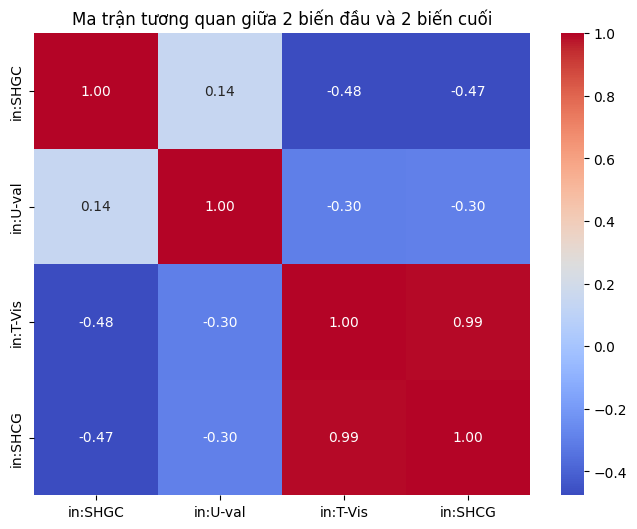

In [44]:
# Lấy tên 2 cột đầu tiên và 2 cột cuối cùng
material = df.columns[:2]
out_put = df.columns[-2:]

# Tạo tập con dữ liệu với 4 cột này
sub_df = df[list(material) + list(out_put)]

# Tính ma trận tương quan
correlation_matrix = sub_df.corr()

# Hiển thị ma trận tương quan
print("Ma trận tương quan giữa 2 biến đầu và 2 biến cuối:")
print(correlation_matrix)

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan giữa 2 biến đầu và 2 biến cuối')
plt.show()


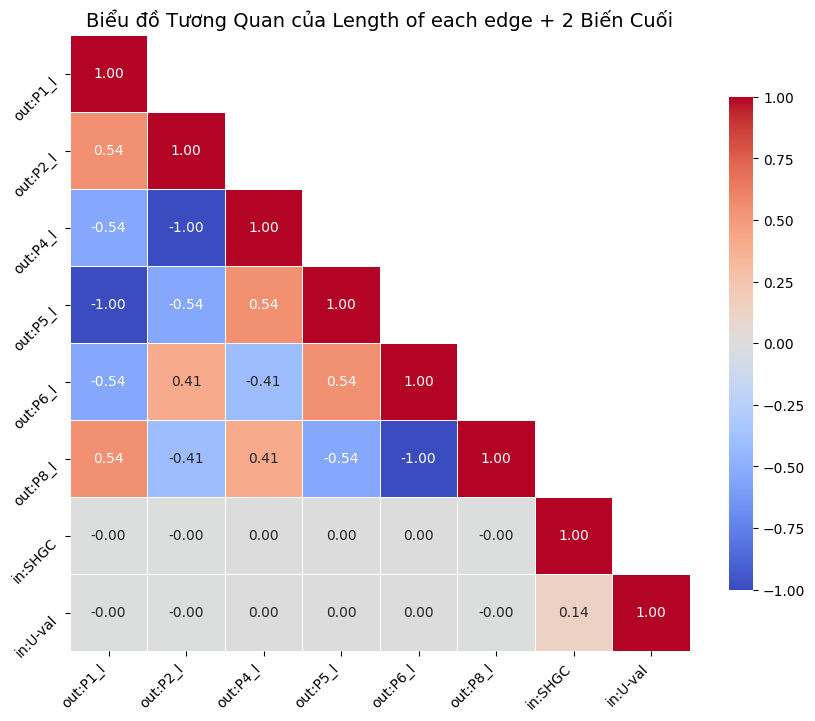

In [45]:
from sklearn.preprocessing import StandardScaler

# Chỉ định các index biến chiều dài
index_l = [2, 6, 14, 18, 22, 30]
subset_df = scaled_df_standard.iloc[:, index_l]

# Lấy và chuẩn hóa 2 biến cuối (nếu chưa chuẩn hóa)
material = df.iloc[:, :2]
scaler = StandardScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material), 
                               columns=material.columns,
                               index=df.index)

# Gộp lại thành một DataFrame mới
combined_df = pd.concat([subset_df, scaled_material], axis=1)

# Tính toán ma trận tương quan
corr_matrix = combined_df.corr()

# Tạo mask tam giác trên (giữ lại đường chéo)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8}, mask=mask)

# Xoay nhãn trục
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Tiêu đề
plt.title("Biểu đồ Tương Quan của Length of each edge + 2 Biến Cuối", fontsize=14)
plt.show()


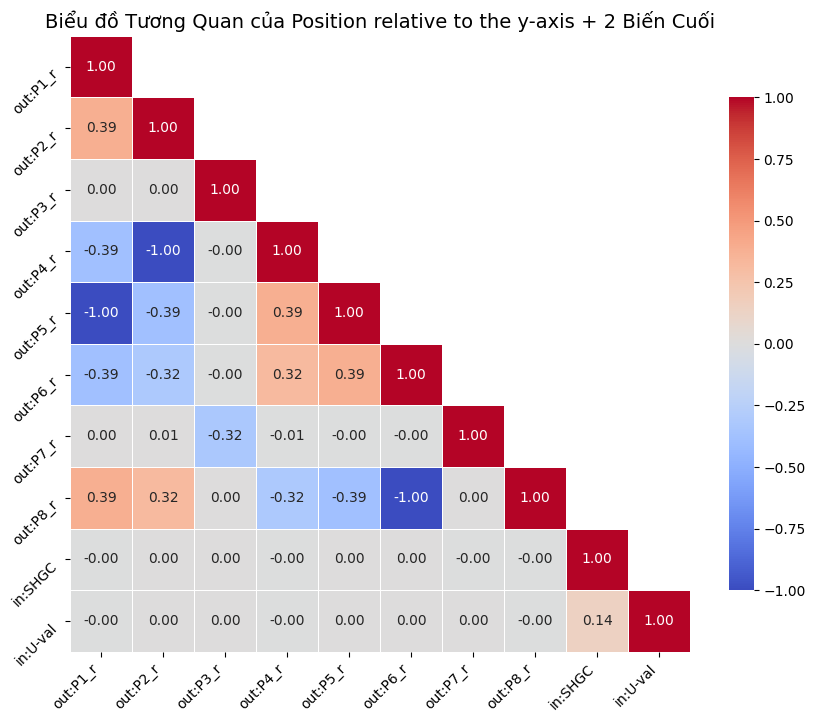

In [46]:
index_r = [3,7,11,15,19,23,27,31]  # Chỉ định các biến bạn muốn vẽ
# Lấy 8 biến tính từ biến thứ 3 (index 2 -> index 9)
subset_df = scaled_df_standard.iloc[:,index_r]

# Bước 2: Chuẩn hóa 2 biến cuối cùng từ df gốc
material = df.iloc[:,:2]
scaler = StandardScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Kết hợp lại
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính toán ma trận tương quan
corr_matrix = extended_subset_df.corr()

# Bước 5: Mask tam giác trên
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8}, mask=mask)

# Bước 7: Định dạng trục
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 8: Tiêu đề
plt.title("Biểu đồ Tương Quan của Position relative to the y-axis + 2 Biến Cuối", fontsize=14)
plt.show()



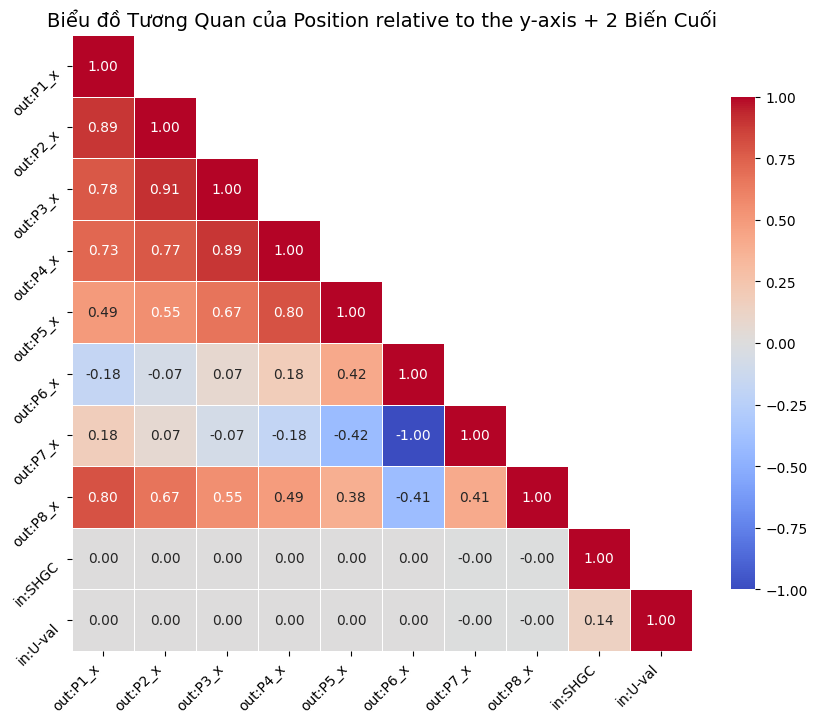

In [47]:
index_x   = [4,8,12,16,20,24,28,32]  # Chỉ định các biến bạn muốn vẽ
# Lấy 8 biến tính từ biến thứ 3 (index 2 -> index 9)
subset_df = scaled_df_standard.iloc[:, index_x]

# Bước 2: Chuẩn hóa 2 biến cuối cùng từ df gốc
material = df.iloc[:, :2]
scaler = StandardScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Kết hợp lại
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính toán ma trận tương quan
corr_matrix = extended_subset_df.corr()

# Bước 5: Mask tam giác trên
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8}, mask=mask)

# Bước 7: Định dạng trục
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 8: Tiêu đề
plt.title("Biểu đồ Tương Quan của Position relative to the y-axis + 2 Biến Cuối", fontsize=14)
plt.show()



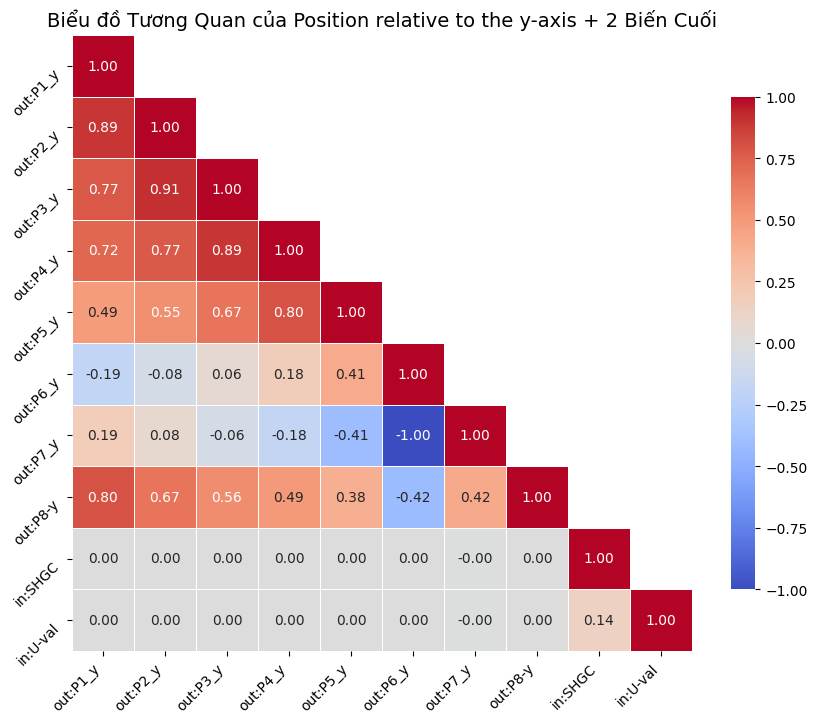

In [48]:
from sklearn.preprocessing import StandardScaler

# Bước 1: Các biến gốc đã được chuẩn hóa
index_y = [5, 9, 13, 17, 21, 25, 29, 33]
subset_df = scaled_df_standard.iloc[:, index_y]

# Bước 2: Chuẩn hóa 2 biến cuối cùng từ df gốc
material = df.iloc[:, :2]
scaler = StandardScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Kết hợp lại
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính toán ma trận tương quan
corr_matrix = extended_subset_df.corr()

# Bước 5: Mask tam giác trên
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8}, mask=mask)

# Bước 7: Định dạng trục
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 8: Tiêu đề
plt.title("Biểu đồ Tương Quan của Position relative to the y-axis + 2 Biến Cuối", fontsize=14)
plt.show()


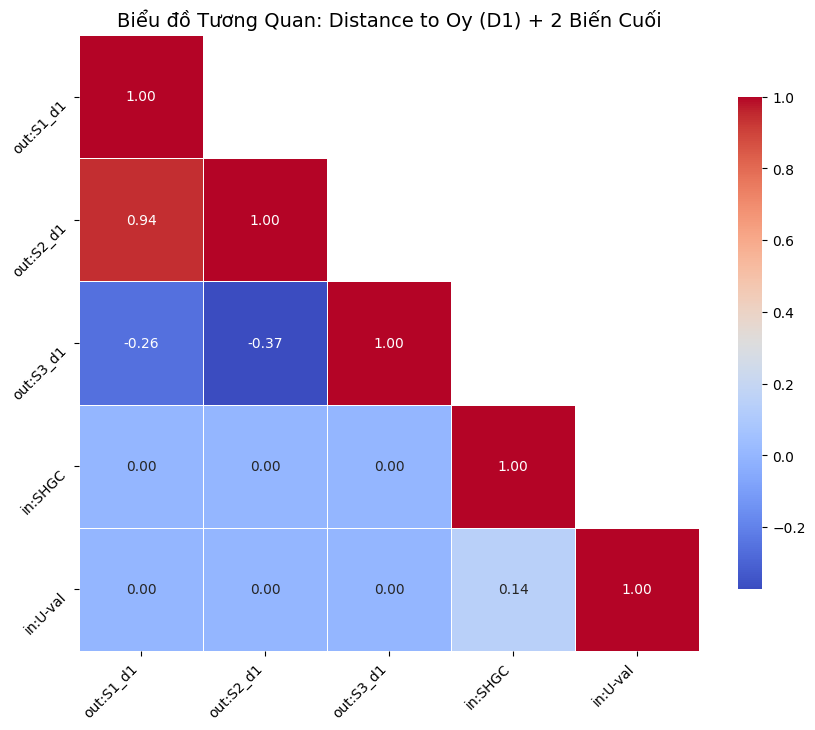

In [49]:
from sklearn.preprocessing import StandardScaler

# Bước 1: Lấy 3 biến từ nhóm index_d1
index_d1 = [34, 40, 46]
subset_df = scaled_df_standard.iloc[:, index_d1]

# Bước 2: Chuẩn hóa 2 biến cuối từ df gốc
material = df.iloc[:, :2]
scaler = StandardScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Kết hợp lại với 3 biến ban đầu
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính ma trận tương quan
corr_matrix_extended = extended_subset_df.corr()

# Bước 5: Tạo mask tam giác trên
mask = np.triu(np.ones_like(corr_matrix_extended, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_extended, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8}, mask=mask)

# Bước 7: Định dạng trục
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 8: Tiêu đề
plt.title("Biểu đồ Tương Quan: Distance to Oy (D1) + 2 Biến Cuối", fontsize=14)
plt.show()


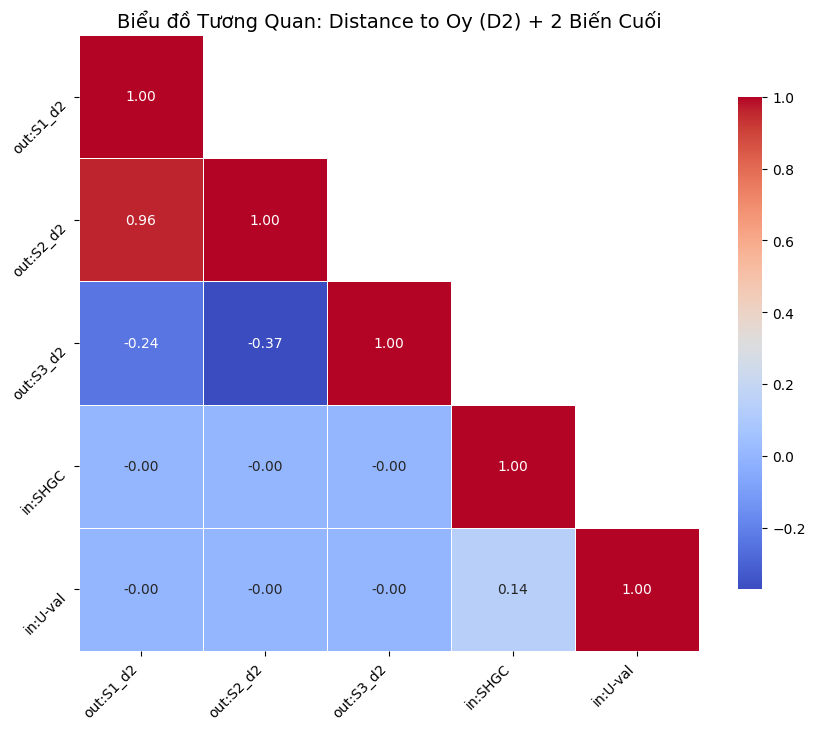

In [50]:
from sklearn.preprocessing import StandardScaler

# Bước 1: Lấy 3 biến từ nhóm index_d2
index_d2 = [35, 41, 47]
subset_df = scaled_df_standard.iloc[:, index_d2]

# Bước 2: Chuẩn hóa 2 biến cuối từ df gốc
material = df.iloc[:, :2]
scaler = StandardScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Kết hợp lại với 3 biến ban đầu
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính ma trận tương quan
corr_matrix_extended = extended_subset_df.corr()

# Bước 5: Tạo mask tam giác trên
mask = np.triu(np.ones_like(corr_matrix_extended, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_extended, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8}, mask=mask)

# Bước 7: Định dạng trục
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 8: Tiêu đề
plt.title("Biểu đồ Tương Quan: Distance to Oy (D2) + 2 Biến Cuối", fontsize=14)
plt.show()


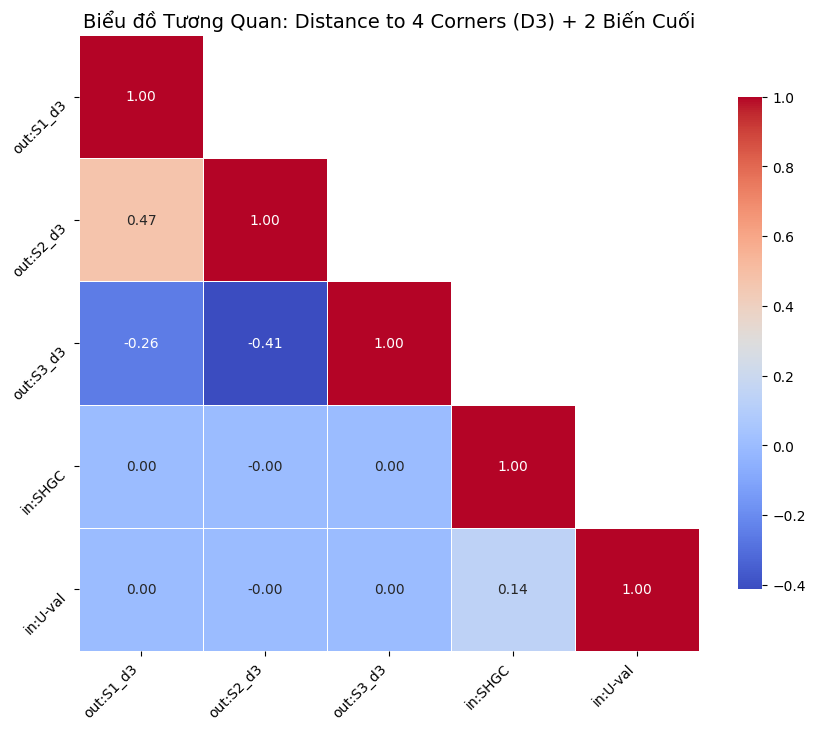

In [51]:
from sklearn.preprocessing import StandardScaler

# Bước 1: Chọn 3 biến theo index_d3 từ scaled_df_standard
index_d3 = [36, 42, 48]
subset_df = scaled_df_standard.iloc[:, index_d3]

# Bước 2: Lấy 2 biến cuối từ df gốc
material = df.iloc[:, :2]

# Chuẩn hóa 2 biến cuối (để đồng bộ scale với scaled_df_standard)
scaler = StandardScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Kết hợp lại thành một DataFrame mở rộng
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính ma trận tương quan
corr_matrix_extended = extended_subset_df.corr()

# Bước 5: Tạo mask tam giác trên
mask = np.triu(np.ones_like(corr_matrix_extended, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_extended, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8}, mask=mask)

# Bước 7: Định dạng nhãn
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 8: Thêm tiêu đề
plt.title("Biểu đồ Tương Quan: Distance to 4 Corners (D3) + 2 Biến Cuối", fontsize=14)
plt.show()


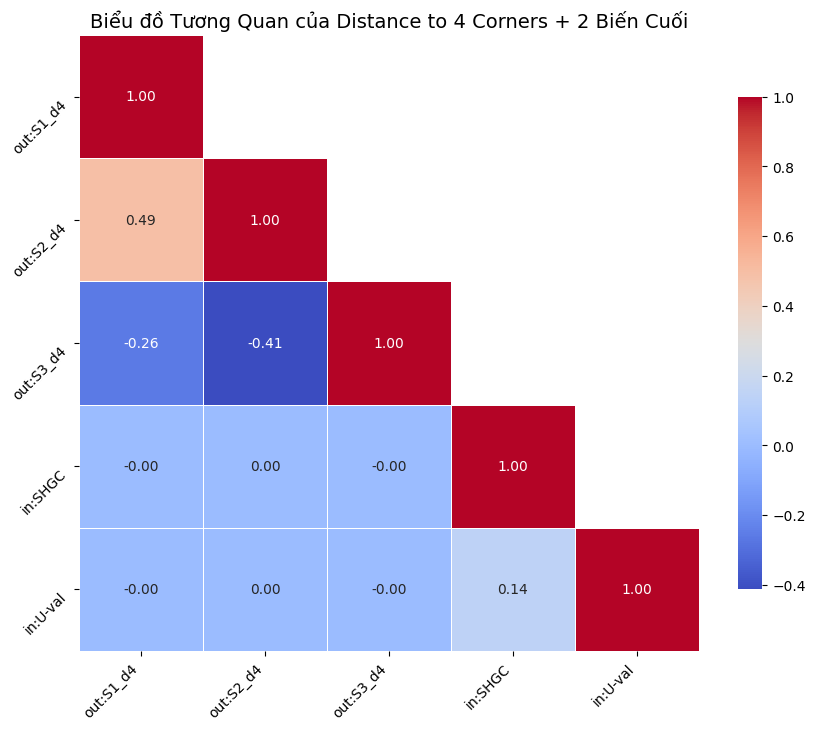

In [52]:
from sklearn.preprocessing import StandardScaler

# Bước 1: Chọn các biến từ scaled_df_standard
index_d4 = [37, 43, 49]
subset_df = scaled_df_standard.iloc[:, index_d4]

# Bước 2: Lấy 2 biến cuối từ DataFrame gốc
material = df.iloc[:, :2]

# Chuẩn hóa 2 biến cuối
scaler = StandardScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Ghép lại thành một DataFrame mở rộng
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính toán ma trận tương quan
corr_matrix_extended = extended_subset_df.corr()

# Bước 5: Tạo mask tam giác trên
mask = np.triu(np.ones_like(corr_matrix_extended, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_extended, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8}, mask=mask)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 7: Tiêu đề
plt.title("Biểu đồ Tương Quan của Distance to 4 Corners + 2 Biến Cuối", fontsize=14)
plt.show()


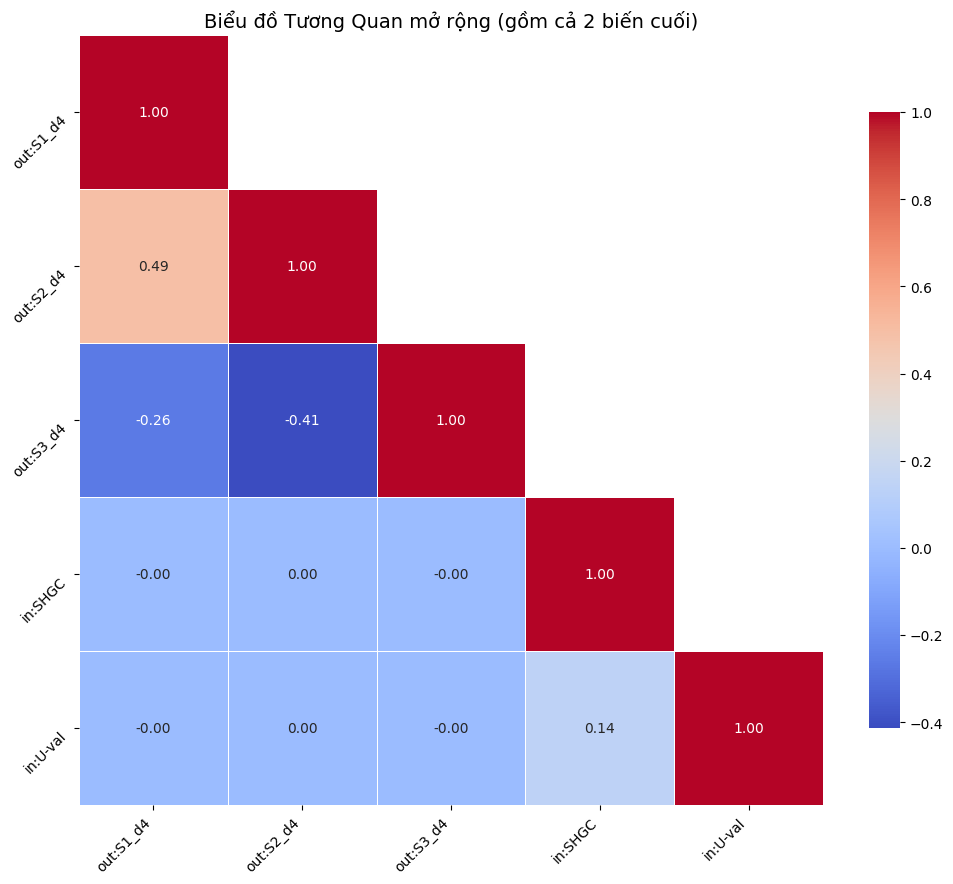

In [53]:
from sklearn.preprocessing import StandardScaler

# Giả sử df là DataFrame gốc (chưa scale)
# scaled_df_standard là DataFrame đã chuẩn hóa bằng StandardScaler

# Lấy 2 biến cuối cùng
material = df.iloc[:, :2]

# Scale 2 biến cuối cùng bằng StandardScaler như các biến trong scaled_df_standard
scaler = StandardScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Ghép 2 biến đã scale vào subset_df
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Tính toán ma trận tương quan mới
corr_matrix_extended = extended_subset_df.corr()

# Tạo lại mask tam giác trên, trừ đường chéo
mask = np.triu(np.ones_like(corr_matrix_extended, dtype=bool), k=1)

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_extended, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8}, mask=mask)

# Xoay nhãn trục
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Thêm tiêu đề
plt.title("Biểu đồ Tương Quan mở rộng (gồm cả 2 biến cuối)", fontsize=14)
plt.show()


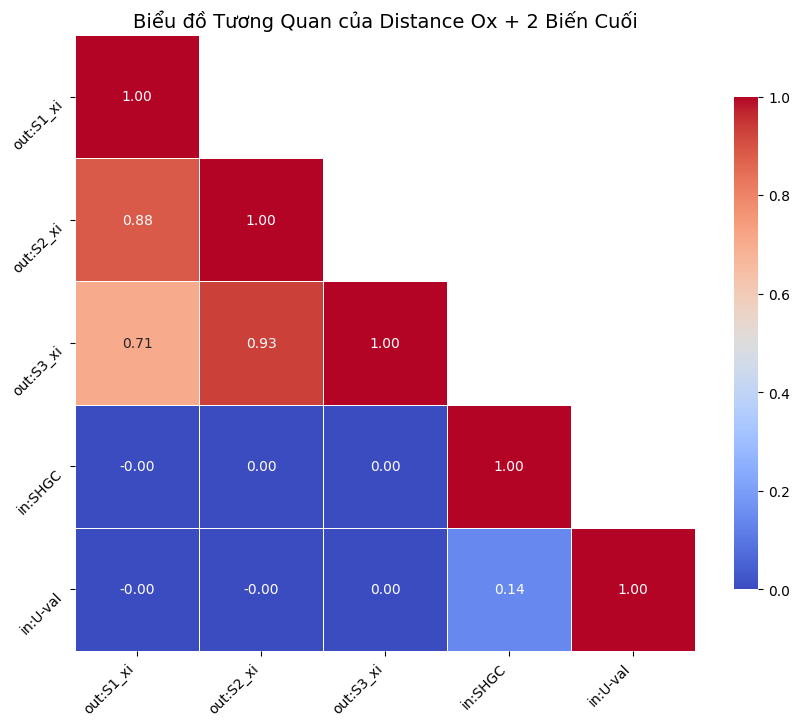

In [54]:
from sklearn.preprocessing import StandardScaler

# Bước 1: Chọn 3 biến Ox từ scaled_df_standard
index_xi = [38, 44, 50]
subset_df = scaled_df_standard.iloc[:, index_xi]

# Bước 2: Lấy 2 biến cuối cùng từ DataFrame gốc (giả sử tên là df)
material = df.iloc[:, :2]

# Chuẩn hóa 2 biến cuối bằng StandardScaler để thống nhất với scaled_df_standard
scaler = StandardScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Ghép lại thành 1 DataFrame mở rộng
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính toán ma trận tương quan mở rộng
corr_matrix_extended = extended_subset_df.corr()

# Bước 5: Tạo mask tam giác trên (loại bỏ phần dư)
mask = np.triu(np.ones_like(corr_matrix_extended, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_extended, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8}, mask=mask)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 7: Tiêu đề
plt.title("Biểu đồ Tương Quan của Distance Ox + 2 Biến Cuối", fontsize=14)
plt.show()


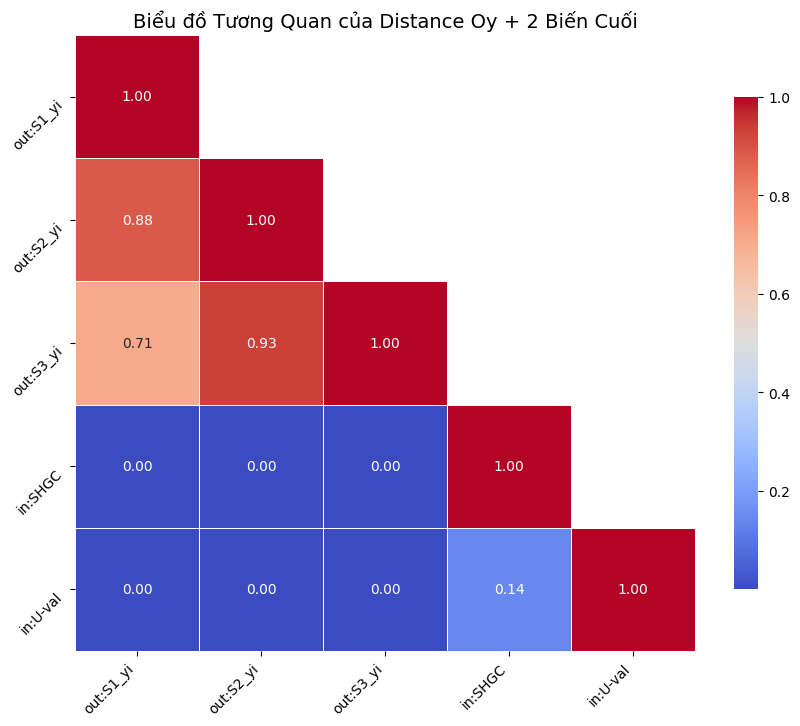

In [55]:
from sklearn.preprocessing import StandardScaler

# Bước 1: Chọn 3 biến Oy từ scaled_df_standard
index_yi = [39, 45, 51]
subset_df = scaled_df_standard.iloc[:, index_yi]

# Bước 2: Lấy 2 biến cuối từ DataFrame gốc
material = df.iloc[:, :2]

# Chuẩn hóa 2 biến cuối để cùng scale
scaler = StandardScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Ghép lại thành 1 DataFrame mở rộng
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính toán ma trận tương quan
corr_matrix_extended = extended_subset_df.corr()

# Bước 5: Mask tam giác trên
mask = np.triu(np.ones_like(corr_matrix_extended, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_extended, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8}, mask=mask)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 7: Tiêu đề
plt.title("Biểu đồ Tương Quan của Distance Oy + 2 Biến Cuối", fontsize=14)
plt.show()


In [56]:
from sklearn.preprocessing import Normalizer
import pandas as pd

# Khởi tạo normalizer với norm='l2'
l2_normalizer = Normalizer(norm='l2')

# Chuẩn hóa từng hàng trong df
df_normalized = l2_normalizer.fit_transform(scaled_df_standard)

# Chuyển kết quả về DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

# Kiểm tra
print(df_normalized.head())


    in:SHGC  in:U-val  out:P1_l  out:P1_r  out:P1_x  out:P1_y  out:P2_l  \
0  0.050665       0.0  0.126663  0.126663  0.215053  0.148761  0.126663   
1  0.049265       0.0  0.142215  0.123162  0.203351  0.166135  0.123162   
2  0.048681       0.0  0.162271  0.121703  0.185399  0.179710  0.121703   
3  0.048393       0.0  0.190833  0.120984  0.163197  0.184303  0.120984   
4  0.047008       0.0  0.235040  0.117520  0.138022  0.173533  0.117520   

   out:P2_r  out:P2_x  out:P2_y  ...  out:S3_d1  out:S3_d2  out:S3_d3  \
0  0.126663  0.248611  0.146988  ...   0.044529   0.044529   0.028046   
1  0.123162  0.236442  0.162687  ...   0.043298   0.043298   0.027271   
2  0.121703  0.219346  0.175056  ...   0.042785   0.042785   0.026948   
3  0.120984  0.198636  0.179223  ...   0.042532   0.042532   0.026788   
4  0.117520  0.174092  0.169039  ...   0.041314   0.041314   0.026021   

   out:S3_d4  out:S3_xi  out:S3_yi  out:Total-CoolingLoad (J)  \
0   0.028046   0.253327   0.126663           

In [57]:
from sklearn.model_selection import train_test_split

# Giả sử bạn đã tạo df_normalized (được chuẩn hóa theo L2)
# Và target_columns là tên các cột mục tiêu
target_columns = ['out:Total-CoolingLoad (J)', 'out:Total_HEAT-LOSS(J)']

# Chia dữ liệu thành X và y từ df_normalized
X = df_normalized.drop(columns=target_columns)
y = df_normalized[target_columns]

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Kiểm tra kết quả
print(f"Kích thước tập X_train: {X_train.shape}")
print(f"Kích thước tập X_test: {X_test.shape}")
print(f"Kích thước tập y_train: {y_train.shape}")
print(f"Kích thước tập y_test: {y_test.shape}")


Kích thước tập X_train: (14280, 54)
Kích thước tập X_test: (3570, 54)
Kích thước tập y_train: (14280, 2)
Kích thước tập y_test: (3570, 2)


Chia dữ liệu train - test

In [58]:
from sklearn.model_selection import train_test_split
# Giả sử 'target_columns' là tên các cột biến mục tiêu của bạn
target_columns = ['out:Total-CoolingLoad (J)', 'out:Total_HEAT-LOSS(J)']

# Chia dữ liệu thành X và y
X_scaled = scaled_df_standard.drop(columns=target_columns)  # Xử lý các cột đặc trưng
y_scaled = scaled_df_standard[target_columns]  # Cột mục tiêu

# Chia thành tập train và test cho cả X và y
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Kiểm tra kích thước của các tập train và test
print(f"Kích thước tập X_train: {X_train.shape}")
print(f"Kích thước tập X_test: {X_test.shape}")
print(f"Kích thước tập y_train: {y_train.shape}")
print(f"Kích thước tập y_test: {y_test.shape}")


Kích thước tập X_train: (14280, 54)
Kích thước tập X_test: (3570, 54)
Kích thước tập y_train: (14280, 2)
Kích thước tập y_test: (3570, 2)


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import pandas as pd

# Dummy data dimensions (thay bằng dữ liệu thật của bạn)
input_dim = X_train.shape[1]                # số feature đầu vào
output_dim = len(target_columns)            # số đầu ra

# Learning rate schedule (Exponential Decay)
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True
)

# Model definition
model_1 = Sequential([
    Dense(256, input_dim=input_dim, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(output_dim)
])

# Compile the model
model_1.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mean_squared_error')

# -----------------------------------------
# 🔍 Hiển thị thông tin parameters
# -----------------------------------------
model_1.summary()

# -----------------------------------------
# 🧠 Hiển thị số lượng parameters từng layer (chi tiết hơn)
# -----------------------------------------
print("\nChi tiết các tham số học được (Weights + Biases):")
for i, layer in enumerate(model_1.layers):
    weights = layer.get_weights()
    if weights:
        weight_shape = [w.shape for w in weights]
        print(f"Layer {i+1} ({layer.name}):")
        print(f"  Weights shape: {weight_shape}")
        print(f"  Tổng tham số: {layer.count_params()}")
    else:
        print(f"Layer {i+1} ({layer.name}): No learnable parameters.")

# -----------------------------------------
# 📋 Hiển thị các Hyperparameter
# -----------------------------------------
print("\nHyperparameters:")
hyperparams = {
    "initial_learning_rate": lr_schedule.initial_learning_rate,
    "decay_steps": lr_schedule.decay_steps,
    "decay_rate": lr_schedule.decay_rate,
    "staircase": lr_schedule.staircase,
    "dropout_rates": [layer.rate for layer in model_1.layers if isinstance(layer, Dropout)],
    "optimizer": type(model_1.optimizer).__name__,
    "loss": model_1.loss,
    "activation_functions": [layer.activation.__name__ for layer in model_1.layers if isinstance(layer, Dense)],
    "dense_units": [layer.units for layer in model_1.layers if isinstance(layer, Dense)]
}
df = pd.DataFrame(list(hyperparams.items()), columns=["Hyperparameter", "Value"])
print(df.to_string(index=False))


C:\Users\Bon\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,362 (216.26 KB)

 Trainable params: 55,362 (216.26 KB)

 Non-trainable params: 0 (0.00 B)


Chi tiết các tham số học được (Weights + Biases):
Layer 1 (dense_12):
  Weights shape: [(54, 256), (256,)]
  Tổng tham số: 14080
Layer 2 (dropout_9): No learnable parameters.
Layer 3 (dense_13):
  Weights shape: [(256, 128), (128,)]
  Tổng tham số: 32896
Layer 4 (dropout_10): No learnable parameters.
Layer 5 (dense_14):
  Weights shape: [(128, 64), (64,)]
  Tổng tham số: 8256
Layer 6 (dropout_11): No learnable parameters.
Layer 7 (dense_15):
  Weights shape: [(64, 2), (2,)]
  Tổng tham số: 130

Hyperparameters:
       Hyperparameter                      Value
initial_learning_rate                      0.001
          decay_steps                      10000
           decay_rate                        0.9
            staircase                       True
        dropout_rates            [0.4, 0.4, 0.2]
            optimizer                       Adam
                 loss         mean_squared_error
 activation_functions [relu, relu, relu, linear]
          dense_units          [256, 128,

In [60]:
# Mô hình ANN 2: Mô hình với nhiều lớp
model_2 = Sequential([
    Dense(256, input_dim=input_dim, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(output_dim)
])

model_2.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\Bon\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
# Mô hình ANN 3: Mô hình phức tạp hơn
model_3 = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(target_columns))
])

model_3.compile(optimizer='adam', loss='mean_squared_error')


In [62]:
# Import đầy đủ các thư viện cần thiết
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

    # Hàm đánh giá mô hình
def evaluate_model_sklearn(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

    # Khởi tạo và đánh giá các mô hình
models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(random_state=42),
        "SVR": MultiOutputRegressor(SVR(kernel='rbf'))  # Hỗ trợ cho đầu ra nhiều biến
    }

results = {
        "Model": [],
        "RMSE": [],
        "MAE": [],
        "R²": []
    }

    # Đánh giá từng mô hình
for name, model in models.items():
        rmse, mae, r2 = evaluate_model_sklearn(model, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)
        results["Model"].append(name)
        results["RMSE"].append(rmse)
        results["MAE"].append(mae)
        results["R²"].append(r2)

    # Hiển thị kết quả
results_df = pd.DataFrame(results)
print(results_df)

               Model      RMSE       MAE        R²
0  Linear Regression  0.076660  0.051253  0.922879
1      Decision Tree  0.010040  0.006655  0.998449
2      Random Forest  0.006971  0.004692  0.999260
3                SVR  0.063746  0.051109  0.941099


Epoch 1/100
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7870 - loss: 0.0041 - mae: 0.0486 - val_accuracy: 0.9639 - val_loss: 4.6739e-04 - val_mae: 0.0172
Epoch 2/100
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9362 - loss: 8.9359e-04 - mae: 0.0229 - val_accuracy: 0.9793 - val_loss: 2.4538e-04 - val_mae: 0.0119
Epoch 3/100
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9507 - loss: 5.8668e-04 - mae: 0.0184 - val_accuracy: 0.9814 - val_loss: 1.4436e-04 - val_mae: 0.0095
Epoch 4/100
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9562 - loss: 4.8251e-04 - mae: 0.0166 - val_accuracy: 0.9055 - val_loss: 2.4272e-04 - val_mae: 0.0107
Epoch 5/100
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9519 - loss: 4.3248e-04 - mae: 0.0156 - val_accuracy: 0.9755 - val_loss: 9.8458e-05 - val_mae: 0.0074
Epoch 6/100
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9585 - loss: 3.5774e-04 - mae: 0.0143 - val_accuracy: 0.9814 - val_loss: 1.2354e-04 - val_ma

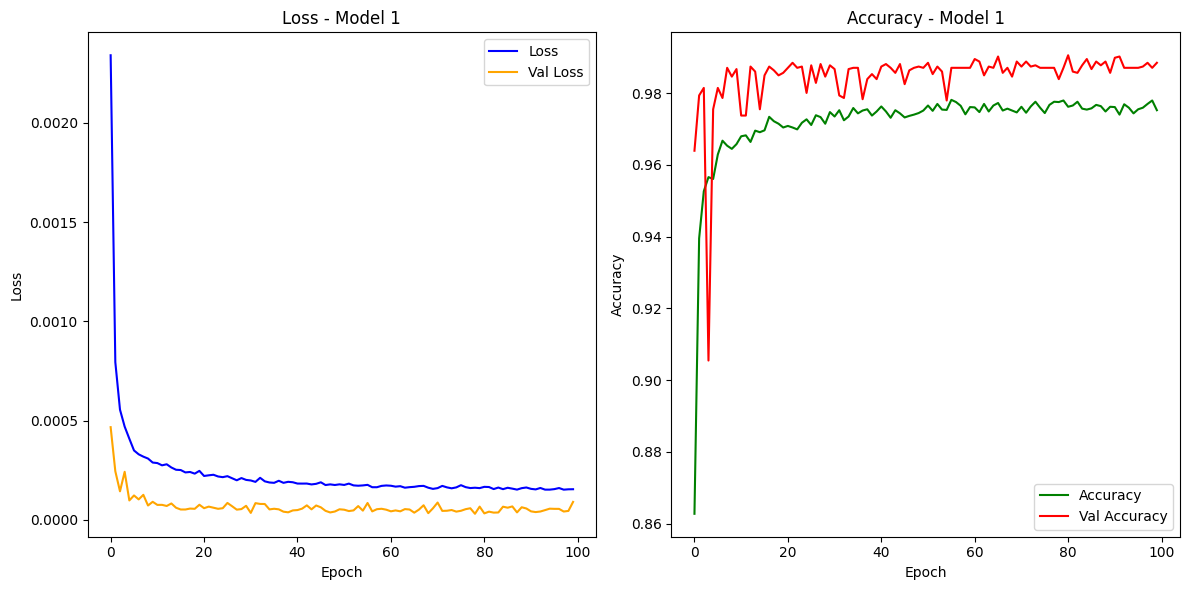

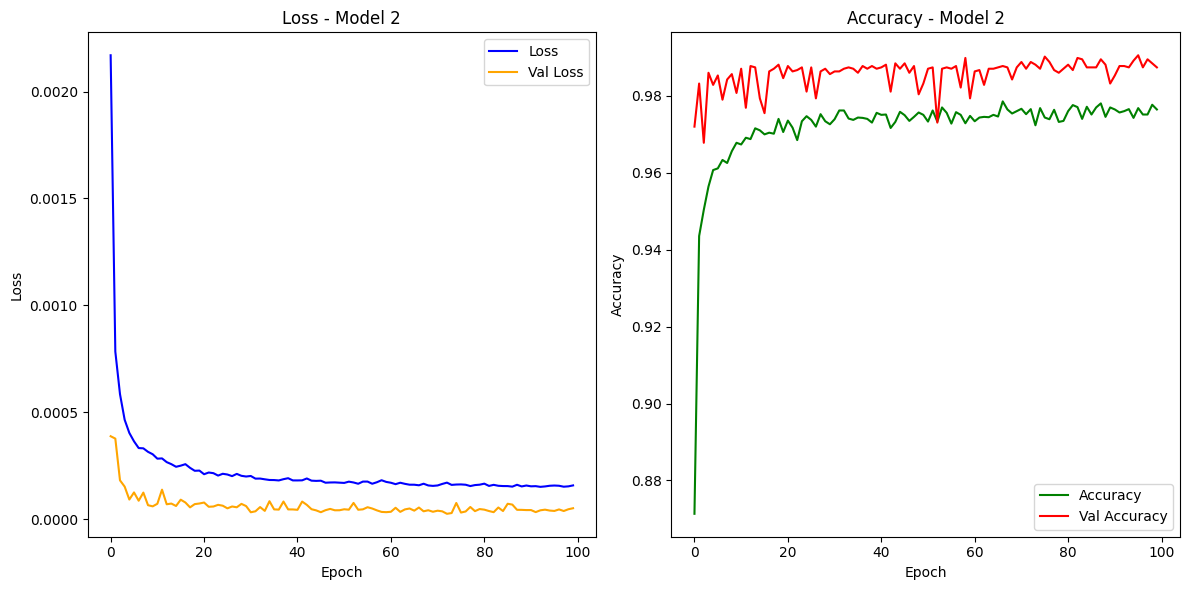

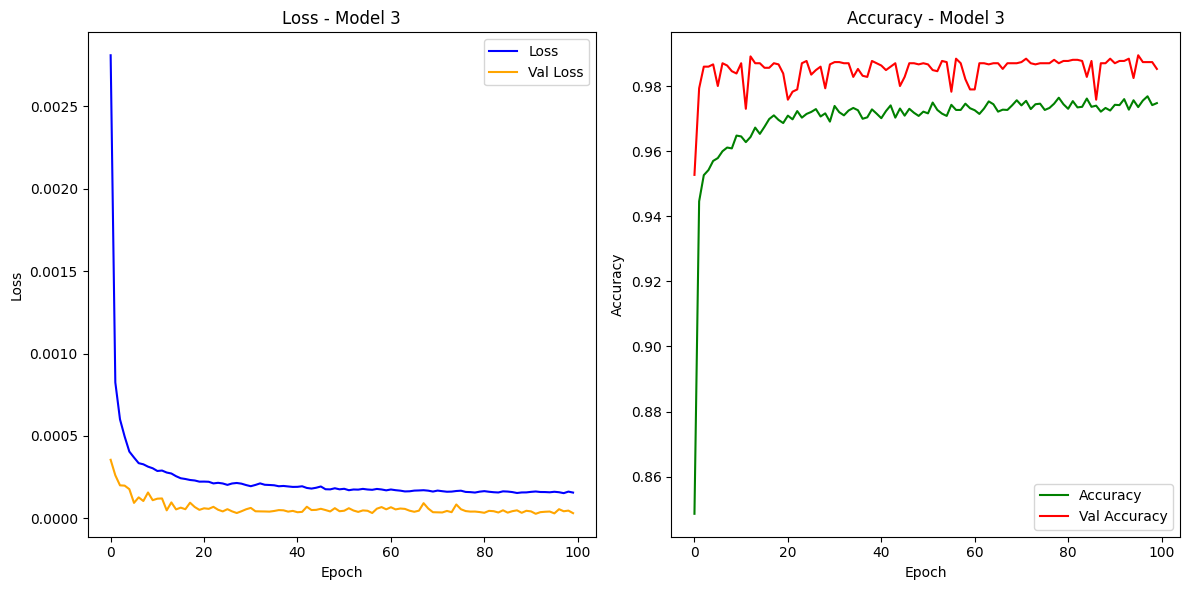

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
Model 1 - RMSE: 0.0096, MAE: 0.0070, R²: 0.9795
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step
Model 2 - RMSE: 0.0071, MAE: 0.0054, R²: 0.9882
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
Model 3 - RMSE: 0.0056, MAE: 0.0043, R²: 0.9923


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Đảm bảo mô hình được biên dịch với 'accuracy'
model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])
model_3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# 2. Huấn luyện các mô hình với verbose=1
epochs = 100
batch_size = 32

# Huấn luyện mô hình 1 và hiển thị quá trình huấn luyện
history_1 = model_1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# Huấn luyện mô hình 2 và hiển thị quá trình huấn luyện
history_2 = model_2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# Huấn luyện mô hình 3 và hiển thị quá trình huấn luyện
history_3 = model_3.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# 3. Hiển thị kết quả huấn luyện
def plot_history(history, model_name):
    plt.figure(figsize=(12, 6))
    
    # Vẽ loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
    plt.title(f'Loss - {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Vẽ accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy', color='green')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='red')
    plt.title(f'Accuracy - {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Vẽ đồ thị cho từng mô hình
plot_history(history_1, 'Model 1')
plot_history(history_2, 'Model 2')
plot_history(history_3, 'Model 3')

# 4. Đánh giá mô hình
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_flat = y_pred  # Dữ liệu đầu ra có thể cần chuyển đổi tùy thuộc vào mô hình

    # Tính các chỉ số đánh giá
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_flat))
    mae = mean_absolute_error(y_test, y_pred_flat)
    r2 = r2_score(y_test, y_pred_flat)

    return rmse, mae, r2

# Đánh giá mô hình 1
rmse_1, mae_1, r2_1 = evaluate_model(model_1, X_test, y_test)
print(f'Model 1 - RMSE: {rmse_1:.4f}, MAE: {mae_1:.4f}, R²: {r2_1:.4f}')

# Đánh giá mô hình 2
rmse_2, mae_2, r2_2 = evaluate_model(model_2, X_test, y_test)
print(f'Model 2 - RMSE: {rmse_2:.4f}, MAE: {mae_2:.4f}, R²: {r2_2:.4f}')

# Đánh giá mô hình 3
rmse_3, mae_3, r2_3 = evaluate_model(model_3, X_test, y_test)
print(f'Model 3 - RMSE: {rmse_3:.4f}, MAE: {mae_3:.4f}, R²: {r2_3:.4f}')


🔍 So sánh hiệu suất giữa các mô hình ANN và học máy truyền thống:
               Model      RMSE       MAE        R²
2      ANN - Model 3  0.005614  0.004273  0.992251
5      Random Forest  0.006971  0.004692  0.999260
1      ANN - Model 2  0.007094  0.005367  0.988199
0      ANN - Model 1  0.009648  0.006998  0.979494
4      Decision Tree  0.010040  0.006655  0.998449
6                SVR  0.063746  0.051109  0.941099
3  Linear Regression  0.076660  0.051253  0.922879


C:\Users\Bon\AppData\Local\Temp\ipykernel_18384\3005279449.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="Model", y="RMSE", palette="Blues_d")


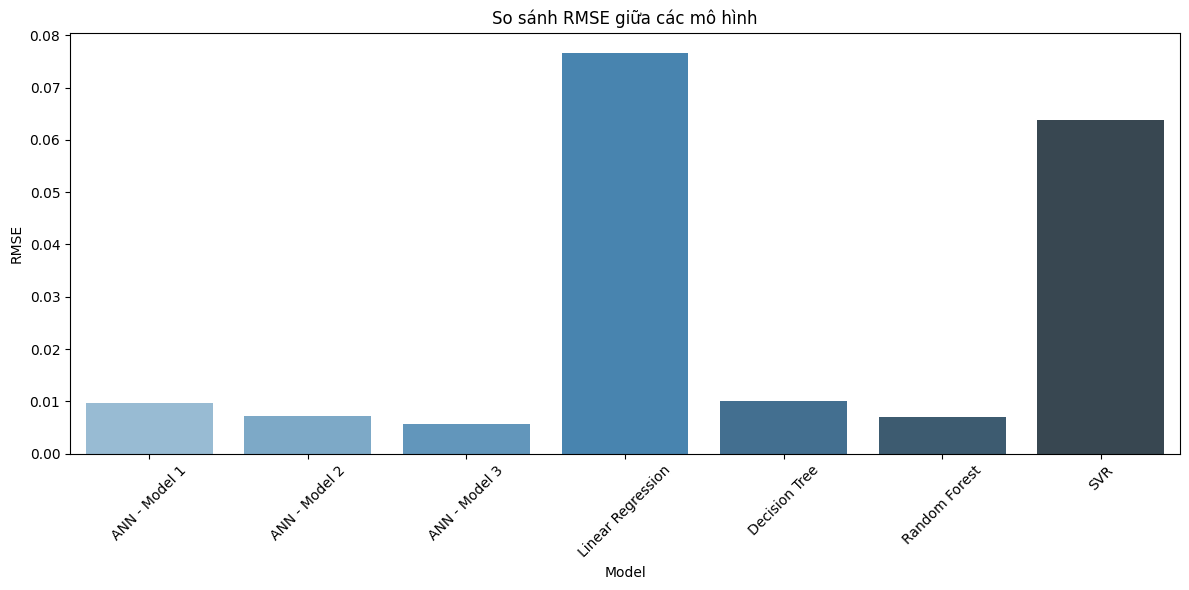

In [64]:
# Tạo khung chứa kết quả so sánh tổng hợp
comparison_results = {
    "Model": [
        "ANN - Model 1",
        "ANN - Model 2",
        "ANN - Model 3",
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "SVR"
    ],
    "RMSE": [
        rmse_1,
        rmse_2,
        rmse_3,
        results_df.loc[results_df["Model"] == "Linear Regression", "RMSE"].values[0],
        results_df.loc[results_df["Model"] == "Decision Tree", "RMSE"].values[0],
        results_df.loc[results_df["Model"] == "Random Forest", "RMSE"].values[0],
        results_df.loc[results_df["Model"] == "SVR", "RMSE"].values[0]
    ],
    "MAE": [
        mae_1,
        mae_2,
        mae_3,
        results_df.loc[results_df["Model"] == "Linear Regression", "MAE"].values[0],
        results_df.loc[results_df["Model"] == "Decision Tree", "MAE"].values[0],
        results_df.loc[results_df["Model"] == "Random Forest", "MAE"].values[0],
        results_df.loc[results_df["Model"] == "SVR", "MAE"].values[0]
    ],
    "R²": [
        r2_1,
        r2_2,
        r2_3,
        results_df.loc[results_df["Model"] == "Linear Regression", "R²"].values[0],
        results_df.loc[results_df["Model"] == "Decision Tree", "R²"].values[0],
        results_df.loc[results_df["Model"] == "Random Forest", "R²"].values[0],
        results_df.loc[results_df["Model"] == "SVR", "R²"].values[0]
    ]
}

# Tạo DataFrame từ kết quả
comparison_df = pd.DataFrame(comparison_results)

# Hiển thị kết quả
print("🔍 So sánh hiệu suất giữa các mô hình ANN và học máy truyền thống:")
print(comparison_df.sort_values(by="RMSE"))

# Nếu muốn trực quan hóa:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x="Model", y="RMSE", palette="Blues_d")
plt.xticks(rotation=45)
plt.title("So sánh RMSE giữa các mô hình")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()
